# Ejercicio: Búsqueda de una cara en una colección de imágenes

<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vista en clases.</font>

Departamento de Ciencia de la Computación

Universidad Catolica de Chile

(c) Domingo Mery, http://domingomery.ing.uc.cl



# <font color='orange'>HELLO WORLD !!!

(Ejecute la siguiente celda para verificar que Google Colab está funcionando)

In [ ]:
print('Hello World!!!')

Hello World!!!


# ANTES DE COMENZAR

Por favor ejecute las siguientes celdas que contiene todas las librerías que se utilizarán en este ejercicio. 

<font color='red'> **NO USAR OTRAS LIBRERÍAS**

In [ ]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

!pip install arcface                  # Intalación de Librería de Reconocimiento Facial

!pip3 install mtcnn                   # Intalación de Librería de Detección de Caras
!pip3 install opencv-contrib-python   # Intalación de Librería de Computer Vision

import cv2                            # Librería OpenCV
import matplotlib.pyplot as plt       # Librería para Visualización (gráficas, imágenes, etc.)
import numpy as np                    # Librería de Matemáticas
from   tqdm.auto import tqdm          # Librería para barra de progreso
import os, fnmatch                    # Librería para leer directorios
from   arcface import ArcFace         # Librería de Reconocimiento Facial
from   mtcnn.mtcnn import MTCNN       # Librería de Detección de Caras 

detector = MTCNN()                    # Carga del Detector de Caras
arcface  = ArcFace.ArcFace()          # Carga del Reconocedor Facial

     |████████████████████████████████| 596 kB 4.1 MB/s 
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 462 kB 76.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatibl

# 1.0 FUNCIONES BÁSICAS

## 1.1 Descargar y descomprimir un archivo

Para descargar archivos desde una dirección URL se usa el comando `!wget `: 

- Ejemplo: para descargar `testing.zip` de una dirección de Dropbox:

`!wget https://www.dropbox.com/s/mb505km0dd3zxk/testing.zip`

Para descomprimir un archivo `zip` se usa el comando `!unzip` con el nombre del archivo.

- Ejemplo: para descomprimir el archivo `testing.zip` que ya está en la carpeta principal:

`!unzip testing.zip`


<font color='orange'>EJERCICIO 01: 

Descargar y descomprimir las fotos de la Primera Ministra de Nueva Zelanda que se encuentran comprimidas en el acrhivo `jacinda.zip` en la dirección de Dropbox `https://www.dropbox.com/s/grid26e7i46ey20/jacinda.zip` 

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 01 AQUÍ:

!wget https://www.dropbox.com/s/grid26e7i46ey20/jacinda.zip
!unzip jacinda.zip

--2022-03-31 11:30:01--  https://www.dropbox.com/s/grid26e7i46ey20/jacinda.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/grid26e7i46ey20/jacinda.zip [following]
--2022-03-31 11:30:01--  https://www.dropbox.com/s/raw/grid26e7i46ey20/jacinda.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fb120d5fe7f4bb00f74c3b3aa.dl.dropboxusercontent.com/cd/0/inline/Biis81ZIzuBZJTSO4R1jwZPrgKDKObjp71tUy1TNe9gUoPr63NCMIOaL7LPcAufPeeABTiAiHw_QJBeo1-qX3eOggCiPKMz24wG-0wpifvYrgxoy4HWOR2pOoa5z8n_gmOY2VLeY6Ydhh95MsoYcyAnmXhfvQ7S4s2jXcVeMoeAcZg/file# [following]
--2022-03-31 11:30:01--  https://uc1fb120d5fe7f4bb00f74c3b3aa.dl.dropboxusercontent.com/cd/0/inline/Biis81ZIzuBZJTSO4R1jwZPrgKDKObjp71tUy1TNe9gUoPr63NCMIOaL7LPcAufPeeAB

## 1.2 Lectura y despliegue de imagen

Para leer una imagen se usa el comando `cv2.imread` de opencv

- Ejemplo: Lectura de la imagen `img04.jpg`:

`img = cv2.imread('img04.jpg')`

Para desplegar una imagen es conveniente usar comandos de matplotlib.

- Ejemplo: Despliegue de imagen `img` cargada anteriormente

`plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`)

`plt.title('Mi Imagen')`

`plt.show()`


<font color='orange'>EJERCICIO 02: 

Cargar en la variable `X` la imagen `jacinda_H.png` (esta imagen debió haber sido descargada correctamente en el ejercicio anterior) y despliéguela con el título "Jacinda Ardern".

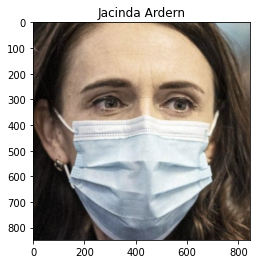

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 02 AQUÍ:

X = cv2.imread('jacinda_H.png')
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Jacinda Ardern')
plt.show()


## 1.3 Cropping de una parte de una imagen

Para obtener una porción rectangular de una imagen se necesitan las coordenadas `(x1,y1)` de la esquina superior izquierda y las coordenadas `(x2,y2)` de la esquina inferior derecha de la imagen dada en pixeles, como este ejemplo: 

`Xcrop = X[y1:y2,x1:x2,:]`

Notar que la variable `x` va de izquierda a dercha, y la variable `y` va de arriba abajo. El primer pixel, con coordenadas `(0,0)` esta arriba a la izquierda en la imagen.

<font color='orange'>EJERCICIO 03: 

Realice el cropping del ojo derecho de la imagen del ejercicio anterior. El resultado despliéguelo en una figura con el título "Ojo Derecho". Para esto tendrá que anotar manualmente las coordenadas viendo los valores en los ejes de la imagen anterior.

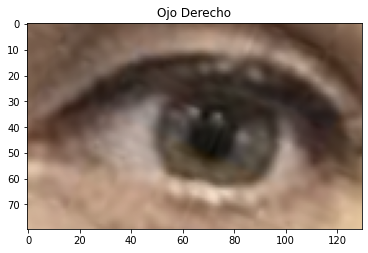

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 03 AQUÍ:

(x1,y1) = (500,280)
(x2,y2) = (630,360)

Xcrop = X[y1:y2,x1:x2,:]

plt.imshow(cv2.cvtColor(Xcrop, cv2.COLOR_BGR2RGB))
plt.title('Ojo Derecho')
plt.show()

## 1.4 Plot de líneas

Para dibujar una línea roja encima de una imagen se usa los siguientes comandos:

`plt.imshow(...` $\leftarrow$  coloque aquí la imagen que desea desplegar con sus parámetros

`plt.plot(x,y,c='red')`

`plt.show()`

donde `x` e `y` son vectores en los que están las coordenas `(x,y)` de la línea que se quiere dibujar.

<font color='orange'>EJERCICIO 04: 

Despliegue la imagen `X` obtenida en el Ejercicio 02, y dibuje un rectángulo rojo en el ojo derecho usando las coordenadas obtenidas en el Ejercicio 03. Este rectángulo es conocido como *bounding box*. La figura debe tener como título "Bounding Box Ojo Derecho"

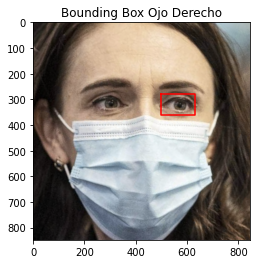

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 04 AQUÍ:

x = [x1,x1,x2,x2,x1]
y = [y1,y2,y2,y1,y1]
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box Ojo Derecho')
plt.plot(x,y,c='red')
plt.show()


# 2.0 Detección de Caras

Para realizar la detección de caras presentes en la imagen `X` usamos el commando:

`face_locations = detector.detect_faces(X)`

El número de caras detectadas se obtiene con el commando:

`n = len(face_locations)`

Para obtener el bounding box número `i` se usa el commando:

`bb = face_locations[i]['box']`

La variable `bb` es un vector de 4 elementos almacenados en este orden:

- `bb[0]`: coordenada `x1` (coordenada x de la esquina superior izquierda del bounding box)

- `bb[1]`: coordenada `y1` (coordenada y de la esquina superior izquierda del bounding box)

- `bb[2]`: ancho `w` del bounding box

- `bb[3]`: alto `h` del bounding box

Los 4 valores están dados en pixeles.





<font color='orange'>EJERCICIO 05: 

Detecte la cara en la imagen `jacinda_C.png` y despliegue en una figura el bounding box en rojo (con título "Bounding Box Cara"), y en otra figura la cara "croppeada" (con título "Jacinda"). Cada figura debe terminar con el commando `plt.show()`.

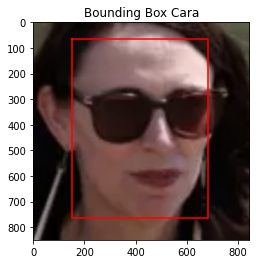

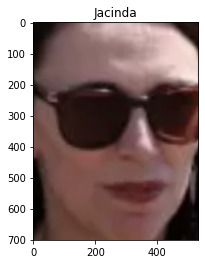

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 05 AQUÍ:

X = cv2.imread('jacinda_C.png')

face_locations = detector.detect_faces(X)
bb = face_locations[0]['box']
x1 = bb[0]
x2 = bb[0]+bb[2]
y1 = bb[1]
y2 = bb[1]+bb[3]

x = [x1,x1,x2,x2,x1]
y = [y1,y2,y2,y1,y1]
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box Cara')
plt.plot(x,y,c='red')
plt.show()

Xcrop = X[y1:y2,x1:x2,:]
plt.imshow(cv2.cvtColor(Xcrop, cv2.COLOR_BGR2RGB))
plt.title('Jacinda')
plt.show()


# 3.0 Reconocimiento facial

Para ver si dos imágenes faciales son de la misma persona, se debe realizar los siguientes pasos:

- Definir `I1`: imagen facial 1

- Definir `I2`: imagen facial 2

- Calcular los descriptores faciales de cada imagen. Recordar que un descriptor facial de ArcFace corresponde a un vector de 512 elementos cuya norma Euclideana es 1.

`d1 = arcface.calc_emb(I1)` $\leftarrow$ Descriptor facial de primera cara

`d2 = arcface.calc_emb(I2)` $\leftarrow$ Descriptor facial de segunda cara

- Calcular el score de similitud de los descriptores usando producto punto:

`score = np.dot(d1,d2.T)`

- Determinar si ambas fotos son de la misma persona comparando el score con un umbral (si es superior al umbral se dice que las fotos son de la misma persona, en caso contrario se dice que son de personas distintas)

`detect = score > th`

La variable `detect` es `True` si las caras son de la misma persona, o `False` si son de personas distintas.





<font color='orange'>EJERCICIO 06: 

Determinar si las fotos `jacinda_A.png` y `jacinda_B.png` son de la misma persona. Para este ejercicio use como umbral `th = 0.6`. NOTA: no es necesario realizar detección de caras en este ejercicio. 

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 06 AQUÍ:

I1 = cv2.imread('jacinda_A.png')
I2 = cv2.imread('jacinda_B.png')

d1 = arcface.calc_emb(I1)
d2 = arcface.calc_emb(I2)

th = 0.6

score = np.dot(d1,d2.T)
detect = score > th

print('score = ',score, detect)

score =  0.66572094 True


<font color='orange'>EJERCICIO 07: 

Repita el ejercicio anterior con las fotos `jacinda_A.png`  y `arturo_vidal.png`

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 07 AQUÍ:

I3 = cv2.imread('arturo_vidal.png')
d3 = arcface.calc_emb(I3)
score = np.dot(d1,d3.T)
detect = score > th
print('score = ',score,detect)

score =  -0.03331941 False


# 4.0 Búsqueda de una persona en una galería de fotos

En este ejercicio deberá buscar la persona que se encuentra enrolada (Loreto) en una galería de 5 imágenes.


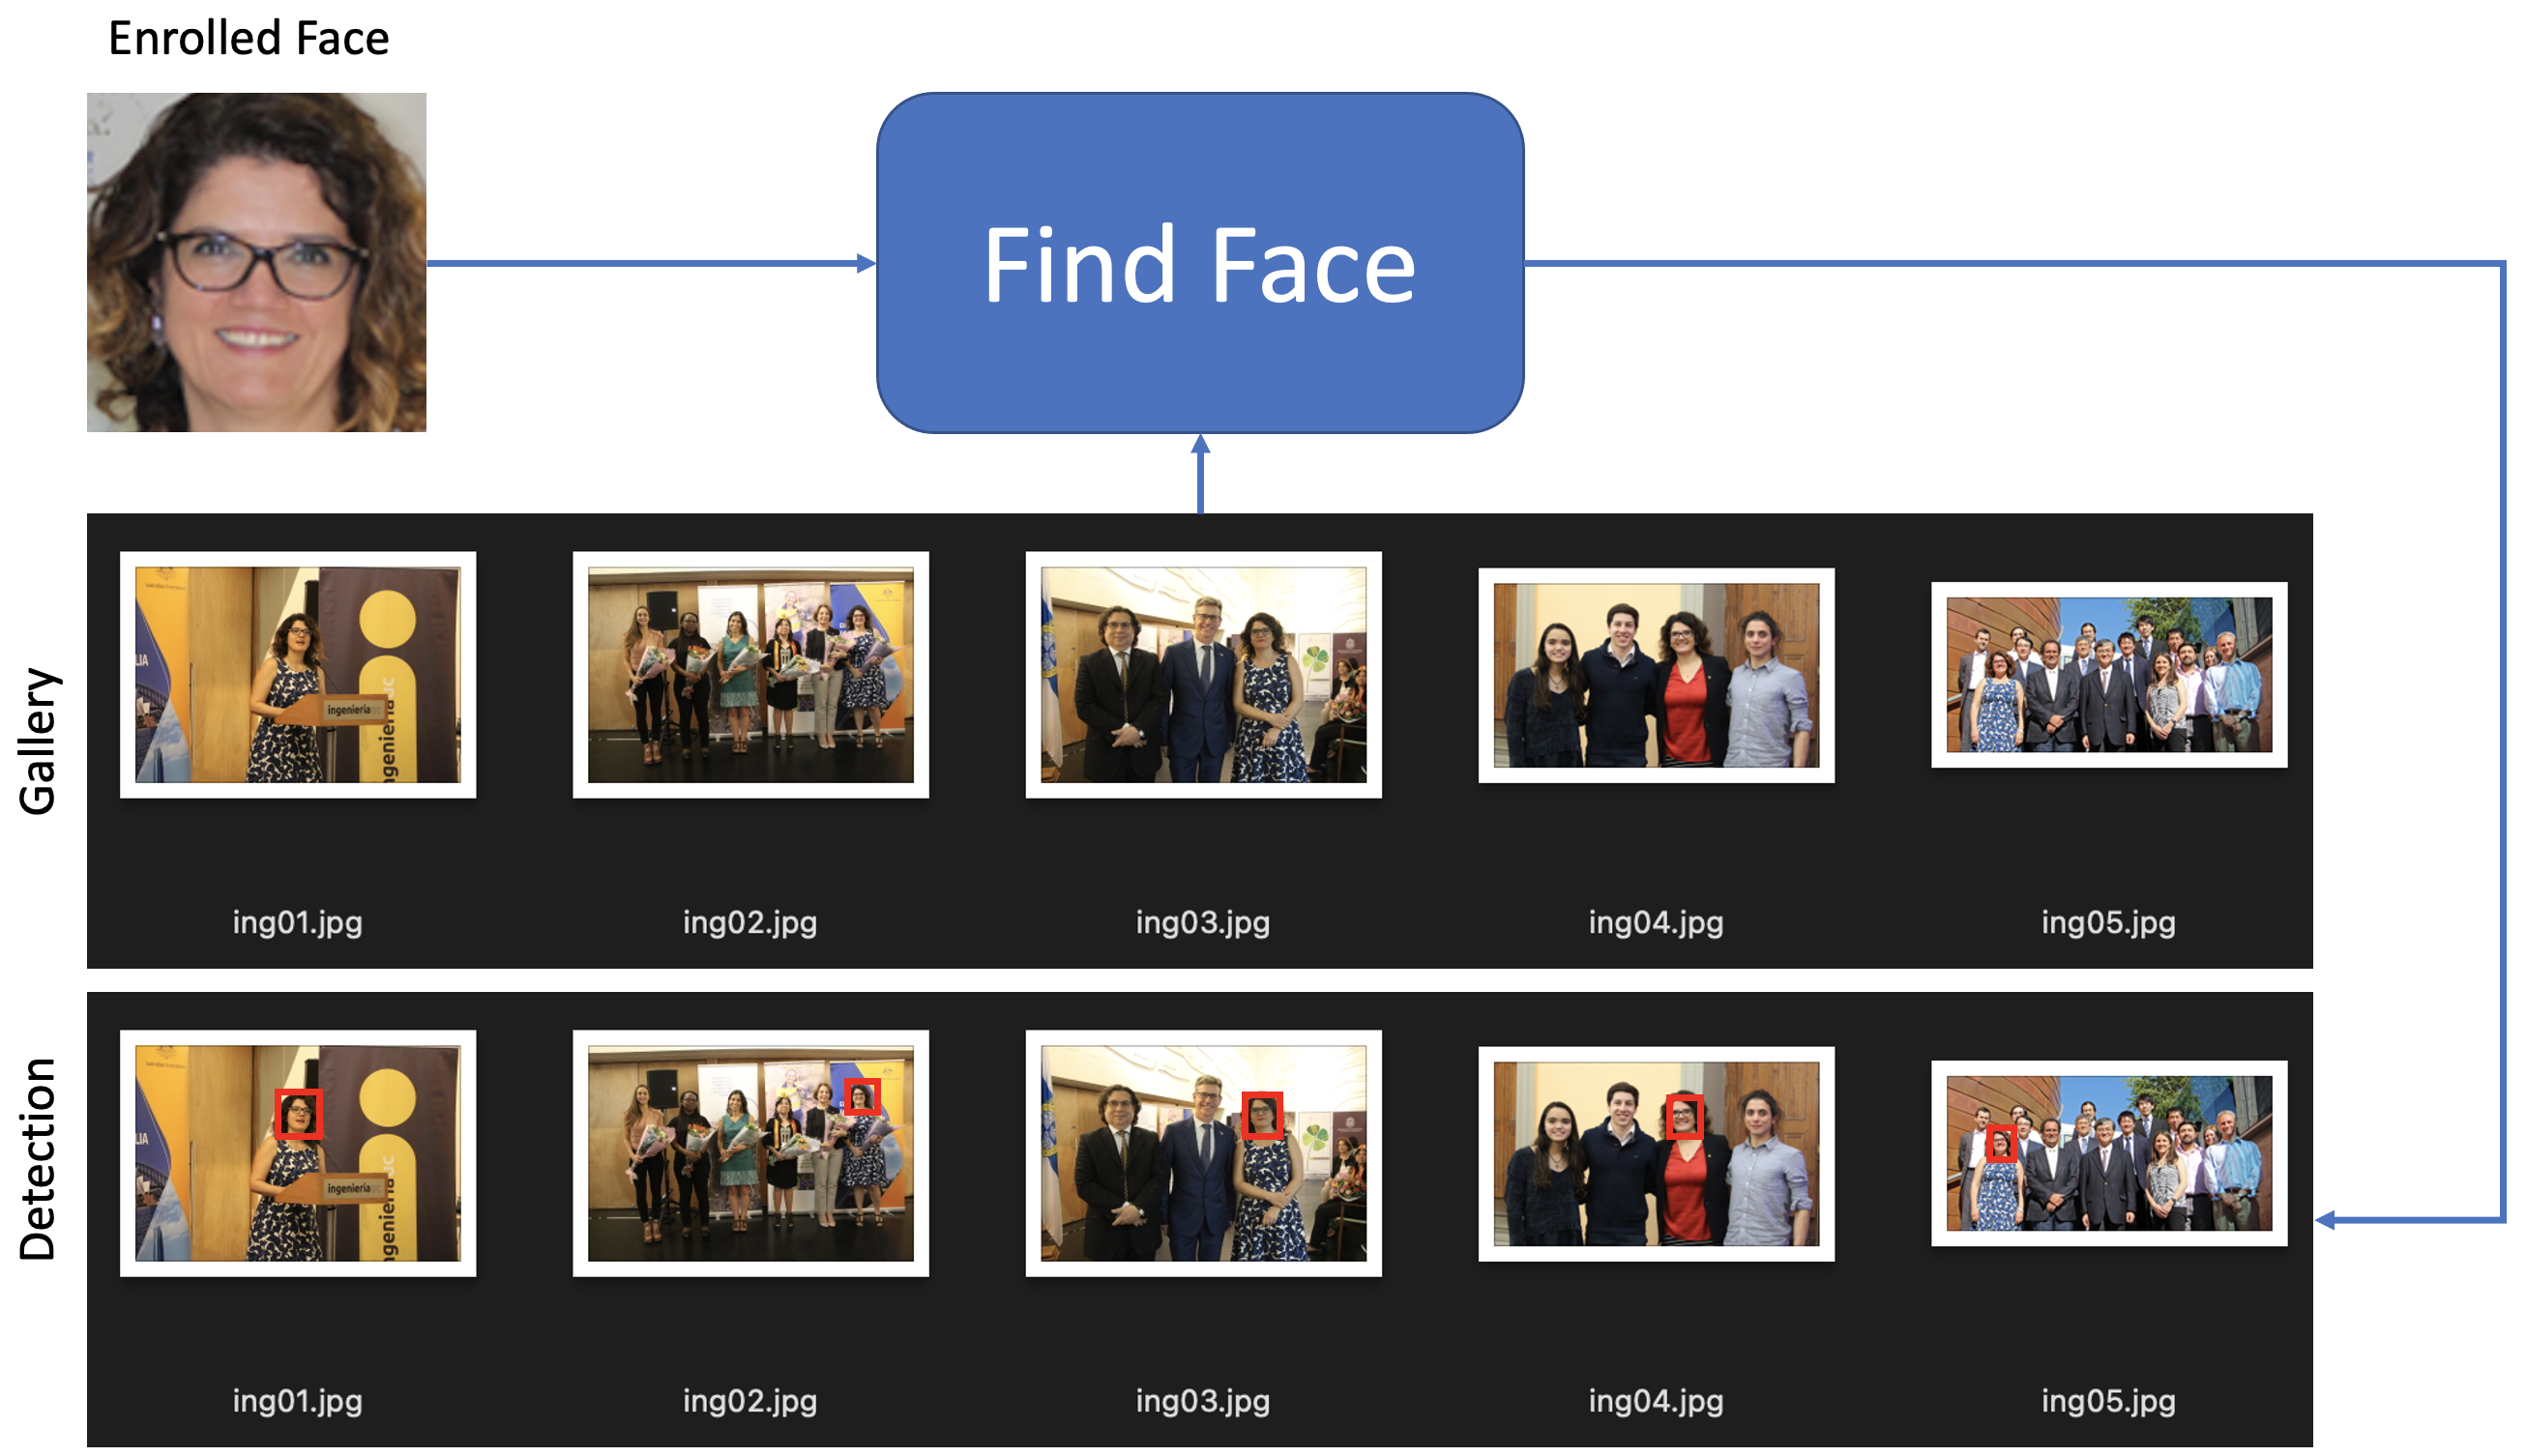

## 4.1 Descarga de la base de datos

La base de datos del ejercicio que se encuentra en `https://www.dropbox.com/s/79wt36ysk8zzlo0/loreto.zip`.

En esta base de datos se encuentra:

* La persona enrolada a buscar (Loreto) cuenta con una foto de enrollamiento: `loreto.jpg`

* La galería de 5 fotos donde buscar se enciuentra en la carpeta `fotos/`



<font color='orange'>EJERCICIO 08: 

Descargue y descomprima la base de datos de Loreto usando la URL mencionada.

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 08 AQUÍ:

!wget https://www.dropbox.com/s/79wt36ysk8zzlo0/loreto.zip
!unzip loreto.zip

--2022-03-31 11:42:08--  https://www.dropbox.com/s/79wt36ysk8zzlo0/loreto.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/79wt36ysk8zzlo0/loreto.zip [following]
--2022-03-31 11:42:09--  https://www.dropbox.com/s/raw/79wt36ysk8zzlo0/loreto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc51bd20908940ab20558a7d5c1.dl.dropboxusercontent.com/cd/0/inline/Big9bNLpq64dh6FiyYYNl2zCNBFJlwi7EDtMEt32GRxK0BF1pdp6SL3e0kACxKFqGn-4tObIa5uMIVy56mhN24eSQvBXVeribHKVpkh3Kl6Wo0dS8S8kyUprM2360PnlzR8kg7WjBAETPd7asZOPmCQvouPcXA0NtNdYHuraTQttdQ/file# [following]
--2022-03-31 11:42:09--  https://ucc51bd20908940ab20558a7d5c1.dl.dropboxusercontent.com/cd/0/inline/Big9bNLpq64dh6FiyYYNl2zCNBFJlwi7EDtMEt32GRxK0BF1pdp6SL3e0kACxKFqGn-4tOb

## 4.2 Detección de la cara de enrolamiento

La cara de enrolamiento es necesario croppearla usando detección facial.


<font color='orange'>EJERCICIO 09: 

Cargue la imagen `loreto.jpg`, realice la detección de caras de esta imagen, almacene en la variable `A` la cara "croppeada" de Loreto y despliéguela con el título "Loreto".


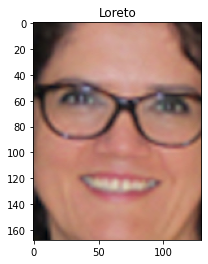

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 09 AQUÍ:

Ao = cv2.imread('loreto.jpg')
face_locations = detector.detect_faces(Ao)
bb = face_locations[0]['box']
x1 = bb[0]
x2 = bb[0]+bb[2]
y1 = bb[1]
y2 = bb[1]+bb[3]
A = Ao[y1:y2,x1:x2,:]
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('Loreto')
plt.show()

## 4.3 Extracción de descriptor de la cara de enrolamiento

Para poder buscar la cara de Loreto en la Galería de Fotos es necesario extraer el descriptor de la cara de enrolamiento.

<font color='orange'>EJERCICIO 10: 

Extraiga el descriptor ArcFace de la imagen almacenada en `A` del ejercicio anterior y almacénelo en la variable `d`.

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 10 AQUÍ:

d = arcface.calc_emb(A)

## 4.4 Detección de caras de la galería 

Ahora es necesario detectar todas las caras de las 5 imágenes de la galería. Para esto es necesario detectar imagen por imagen las caras presentes.



<font color='orange'>EJERCICIO 11: 

Rellene el siguiente código de tal forma que se detecten todas las caras de las imágenes de la galería. El output de este ejercicio debe ser un arreglo `BB` de `N x 5` elementos, donde `N` es el número total de caras detectadas en las 5 imágenes. Para cada cara se debe almacenar las siguientes 5 variables:

* `k`: número de la imagen de la galería

* `x1,y1`: coordenadas de la esquina superior izquierda del bounding box 

* `x2,y2`: coordenadas de la esquina inferior derecha del bounding box 

NOTA: Este código debería detectar `N=44` caras en las 5 imágenes.

In [ ]:
# RELLENE DONDE ENCUENTRE "# <="

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

ipath = 'fotos/'
fotos = dirfiles(ipath,'*.jpg')
print('Galería de fotos:',fotos)

m = len(fotos)
BB = []
for k in range(m):
  img_path = ipath+fotos[k]
  I = cv2.imread(img_path)                  # <= cargar en I la imagen k de la galeria
  print(str(k)+'/'+str(m)+' detecting faces in image '+img_path)
  face_locations = detector.detect_faces(I) # <= cargar en face_locations las caras detectadas en I
  n = len(face_locations)                   # <= cargar en n el número de caras en la imagen I
  print(str(n)+' faces detected')
  for i in range(n):
    bb   = face_locations[i]['box']         # <= cargar en bbox el bounding box i detectado
    x1   = bb[0]                            # <= cargar el valor x1 del bounding box
    y1   = bb[1]                            # <= cargar el valor y1 del bounding box
    x2   = bb[0]+bb[2]                      # <= cargar el valor x2 del bounding box
    y2   = bb[1]+bb[3]                      # <= cargar el valor y2 del bounding box
    BB.append([k,x1,y1,x2,y2])
N = len(BB)
print(str(N)+' faces detected in '+str(m)+' images')

Galería de fotos: ['ing01.jpg', 'ing02.jpg', 'ing03.jpg', 'ing04.jpg', 'ing05.jpg']
0/5 detecting faces in image fotos/ing01.jpg
2 faces detected
1/5 detecting faces in image fotos/ing02.jpg
9 faces detected
2/5 detecting faces in image fotos/ing03.jpg
10 faces detected
3/5 detecting faces in image fotos/ing04.jpg
4 faces detected
4/5 detecting faces in image fotos/ing05.jpg
19 faces detected
44 faces detected in 5 images


## 4.5 Extracción de embeddings de la galería

Para cada una de las caras detectadas es necesario extraer el descriptor ArcFace.

<font color='orange'>EJERCICIO 12: 

Usando el arreglo `BB` del ejercicio anterior defina una matriz `Y` de `N x 512` elementos (recordar que `N` es el número de caras detectadas en toda la galería), en donde la fila de índice `j` de `Y` contenga el descriptor ArcFace de 512 elementos de la cara definida en la fila de índice `j` de `BB`. Para realizar esta operación deberá rellenar el siguiente código.

In [ ]:
# RELLENE DONDE ENCUENTRE "# <="

Y = np.zeros((N,512))
for j in tqdm(range(N)):
  (k,x1,y1,x2,y2) = BB[j]      # <= Cargar el elemento j de BB
  img_path = ipath+fotos[k]    # <= nombre (con su path) de la foto k de la galería
  I = cv2.imread(img_path)     # <= lectura de la foto 
  J = I[y1:y2,x1:x2,:]         # <= cropping de la cara detectada
  ej = arcface.calc_emb(J)     # <= descriptor ArcFace de la cara detectada
  Y[j,:] = ej

  0%|          | 0/44 [00:00<?, ?it/s]

## 4.6 Matching

<font color='orange'> EJERCICIO 13: 

Multiplicando correctamente el vector `d` y la matriz `Y` encuentre un vector binario llamado `detect` (de `N` elementos) donde el elemento `j` indica si la cara detectada `j` en la galería corresponde a la foto del enrolamiento. Para esto utilice un score de matching mayor que 0.6.

In [ ]:
# ESCRIBA CODIGO DEL EJERCIO 13 AQUÍ:

th     = 0.6
score  = np.dot(Y,d.T) # scores
detect = score>th
detect

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

## 4.7  Despliegue de resultados

<font color='orange'>EJERCICIO 14:

Despliegue cada una de las imágenes de la galería mostrando en un rectángulo rojo donde se encuentra la cara de la persona enrolada.

Adicionalmente construya una imagen en la que aparezca la imagen de la cara enrolada, y al lado derecho las caras de esta persona encontradas en la galería.

Para realizar este ejercicio rellene el siguiente código.

In [ ]:
# RELLENE DONDE ENCUENTRE "# <="

dim = (256,256) # para hacer resize de la cara detectada
S = cv2.resize(A,dim)
pos = (25,25)
cv2.putText(S,"Enrolled", pos, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),3)
for k in range(m):
  plt.figure(figsize=(15,20))
  img_path = ipath+fotos[k]   # <= nombre (con su path) de la foto k de la galería
  I = cv2.imread(img_path)    # <= lectura de la imagen k de la galeria
  plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
  plt.title(fotos[k])
  for j in range(N):
    (i,x1,y1,x2,y2) = BB[j]   # <= cargar el elemento j de BB
    if i==k and detect[j]:    
      x = [x1,x1,x2,x2,x1]    # <= cargar coordenadas x del bounding box
      y = [y1,y2,y2,y1,y1]    # <= cargar coordenadas y del bounding box
      plt.plot(x,y,c='red')
      Id = cv2.resize(I[y1:y2,x1:x2,:],dim)
      cv2.putText(Id,fotos[k], pos, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),3)
      S = cv2.hconcat([S,Id])
      print('face recognized in image '+fotos[k]+' > score = '+str(score[j]))
  plt.show()

plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(S, cv2.COLOR_BGR2RGB))
plt.show()

